<a href="https://colab.research.google.com/github/willisbridges/Data-Science-Projects/blob/main/Copy_of_DS_Unit_4_Sprint_Challenge_1_AG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sprint Challenge
## *Data Science Unit 4 Sprint 1*

After a week of Natural Language Processing, you've learned some cool new stuff: how to process text, how turn text into vectors, and how to model topics from documents. Apply your newly acquired skills to one of the most famous NLP datasets out there: [Yelp](https://www.yelp.com/dataset). As part of the job selection process, some of my friends have been asked to create analysis of this dataset, so I want to empower you to have a head start.  

The real dataset is massive (almost 8 gigs uncompressed). The data is sampled for you to something more manageable for the Sprint Challenge. You can analyze the full dataset as a stretch goal or after the sprint challenge. As you work on the challenge, add comments and conclusions about your findings and describe anything you want to analyze in the future.

## Challenge Objectives
Successfully complete all these objectives to earn full credit. 

**Successful completion is defined as passing all the unit tests in each objective.**  

Each unit test that you pass is 1 point. 

There are 5 total possible points in this sprint challenge. 


There are more details on each objective further down in the notebook.*
* <a href="#p1">Part 1</a>: Write a function to tokenize the yelp reviews
* <a href="#p2">Part 2</a>: Create a vector representation of those tokens
* <a href="#p3">Part 3</a>: Use your tokens in a classification model on Yelp rating
* <a href="#p4">Part 4</a>: Estimate & Interpret a topic model of the Yelp reviews

____

# Before you submit your notebook you must first

1) Restart your notebook's Kernel

2) Run all cells sequentially, from top to bottom, so that cell numbers are sequential numbers (i.e. 1,2,3,4,5...)
- Easiest way to do this is to click on the **Cell** tab at the top of your notebook and select **Run All** from the drop down menu. 

3) **Comment out the cell that generates a pyLDAvis visual in objective 4 (see instructions in that section).** 
____

### Part 0: Import Necessary Packages
For this section, you will need to import:
- `spacy` 
- `Pandas`
- `Seaborn`
- `Matplotlib`
- `NearestNeighbors`
- `Pipeline` 
- `TfidfVectorizer`
- `KneighborsClassifier`
- `GridSearchCV`
- `corpora`
- `LdaModel`
- `gensim`
- `re`

> **Note: This assignment is optimized to work with these specific packages. You can use import different packages, but note that this may affect how CodeGrade works, and may cause CodeGrade to fail.**

In [ ]:
!python -m spacy download en_core_web_sm


     |████████████████████████████████| 12.0 MB 6.5 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [ ]:
# YOUR CODE HERE
import re
import pandas as pd
import seaborn as sns
import spacy
import matplotlib 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors


In [ ]:
# Visible Testing
assert pd.__package__ == 'pandas'




### Part 0: Import Data

In [ ]:


# Load reviews from URL
data_url = 'https://raw.githubusercontent.com/bloominstituteoftechnology/data-science-practice-datasets/main/unit_4/unit1_nlp/review_sample.json'

# Import data into a DataFrame named df
df = pd.read_json(data_url, lines=True)

In [ ]:
# Visible Testing
assert isinstance(df, pd.DataFrame), 'df is not a DataFrame. Did you import the data into df?'
assert df.shape[0] == 10000, 'DataFrame df has the wrong number of rows.'

In [ ]:
df.head(10)

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,nDuEqIyRc8YKS1q1fX0CZg,1,2015-03-31 16:50:30,0,eZs2tpEJtXPwawvHnHZIgQ,1,"BEWARE!!! FAKE, FAKE, FAKE....We also own a sm...",10,n1LM36qNg4rqGXIcvVXv8w
1,eMYeEapscbKNqUDCx705hg,0,2015-12-16 05:31:03,0,DoQDWJsNbU0KL1O29l_Xug,4,Came here for lunch Togo. Service was quick. S...,0,5CgjjDAic2-FAvCtiHpytA
2,6Q7-wkCPc1KF75jZLOTcMw,1,2010-06-20 19:14:48,1,DDOdGU7zh56yQHmUnL1idQ,3,I've been to Vegas dozens of times and had nev...,2,BdV-cf3LScmb8kZ7iiBcMA
3,k3zrItO4l9hwfLRwHBDc9w,3,2010-07-13 00:33:45,4,LfTMUWnfGFMOfOIyJcwLVA,1,We went here on a night where they closed off ...,5,cZZnBqh4gAEy4CdNvJailQ
4,6hpfRwGlOzbNv7k5eP9rsQ,1,2018-06-30 02:30:01,0,zJSUdI7bJ8PNJAg4lnl_Gg,4,"3.5 to 4 stars\n\nNot bad for the price, $12.9...",5,n9QO4ClYAS7h9fpQwa5bhA
5,Db3CfZWrtG33UZSs8Tdlsg,1,2016-10-23 22:43:56,1,nXYV_0joQEMXYAfNyOPsRw,4,"Tasty, fast casual Latin street food. The men...",1,Gjz2PCbLZ6midk1n_0LaUg
6,gJhMeq2nVH27tz8LqbD3eQ,0,2013-05-20 19:09:43,0,ZA7SRi6fTRWwpo-B9O72qQ,5,This show is absolutely amazing!! What an incr...,0,BeKPVuqX-2at4izqVwUFEg
7,Yt5gK4E9NqVa14WNiQdBlQ,0,2018-07-12 01:19:53,0,4_GnHPkyTirzK6onIKO4jw,4,Came for the Pho and really enjoyed it! We go...,0,PuXpIJzTBQejeBZh9hwynQ
8,c7WsC8SbUcLyZkREzx9dGA,1,2017-09-27 22:10:26,0,XGGHc7pYgOm5s6SWr8NMXA,5,Absolutely the most Unique experience in a nai...,0,NVVknS1I51z8wY5NNrJ6vQ
9,NSifXpsCRvnsBRqrHF9CJA,0,2015-01-25 08:43:15,0,--e66tyhwCE6eoRmcK2w8g,1,Wow. I walked in and sat at the bar for 10 min...,2,J7MsJKJDSA5OGo2-Hn7MbA


## Part 1: Tokenize Function
<a id="#p1"></a>

Complete the function `tokenize`. Your function should
- Accept one document at a time
- Return a list of tokens

You are free to use any method you have learned this week.

In [ ]:
# Optional: Consider using spaCy in your function. The spaCy library can be imported by running this cell.
# A pre-trained model (en_core_web_sm) has been made available to you in the CodeGrade container.
# If you DON'T need use the en_core_web_sm model, you can comment it out below.

nlp = spacy.load('en_core_web_sm')

In [ ]:
#cleaning data before tokenizing
def clean(text):
    """
    Accepts a single text document and performs several regex substitutions in order to clean the document. 
    
    Parameters
    ----------
    text: string or object 
    
    Returns
    -------
    text: string or object
    """
    
    # order of operations - apply the expression from top to bottom
    date_regex = r"\d+/\d+/\d+"
    punct_regex = r"[^0-9a-zA-Z\s]" # any non-alphanumeric chars
    special_chars_regex = r"[\$\%\&\@+]" 
    numerical_regex =  r"\d+"  # match one or more digits
    
    # Replace any strings matching the above regex patterns with blank strings
    # (effectively removing them from the text)
    text = re.sub(date_regex, "", text)
    text = re.sub(punct_regex, "", text)
    text = re.sub(special_chars_regex, "", text)
    text = re.sub(numerical_regex, "", text)
    return text.lower()

In [ ]:
df['clean_text'] = df['text'].apply(clean)

In [ ]:
df['clean_text'][4]

' to  stars\n\nnot bad for the price  for lunch seniors get  off  pay at the front before eating \n\nthere are hot food salads noodle bar dessert fruits fried varieties and soup\n\nseating in the middle section is a bit too tight but the booths on the side look more spacious\n\ni think the lunch noodle bar would have more variety such as different types of greens vermicelli noodles frozen tofu etc  the tomato and laksa broth were both pretty good'

In [ ]:
def tokenize(doc):
    """
    Uses spaCy language model to tokenize text. 
    Token filters are used to exclude low quality tokens.
    
    Note
    ----
    Remember to check out the spacy docs to see which token flags are available for you to use
    https://spacy.io/api/token
    
    Input
    ----------
    text: string
        raw text document that needs to be tokenized
        
    Returns
    -------
    tokens: list of strings
    """
    #pass text through spacy language model
    doc = nlp(doc)

    #Empty list to store the tokens
    tokens = []

    for token in doc:
      # filter out useless tokens 
      if (not token.is_punct) and (not token.is_stop) and (not token.is_space):
        #return lemmas
        tokens.append(token.lemma_)
    
    return tokens

In [ ]:
df['tokens'] = df.clean_text.apply(tokenize)

In [ ]:
'''Testing'''
assert isinstance(tokenize(df.sample(n=1)["text"].iloc[0]), list), "Make sure your tokenizer function accepts a single document and returns a list of tokens!"

In [ ]:
df['tokens']

0       [beware, fake, fake, fakewe, small, business, ...
1       [come, lunch, togo, service, quick, staff, fri...
2       [have, vegas, dozen, time, step, foot, circus,...
3       [go, night, close, street, party, good, actual...
4       [star, bad, price, lunch, senior, pay, eat, ho...
                              ...                        
9995    [family, hungry, subway, open, hour, guy, work...
9996    [wife, come, couple, friend, sever, excited, p...
9997    [food, ok, brag, food, hot, item, tasty, horri...
9998    [today, visit, great, love, enjoy, town, squar...
9999    [absolute, bad, place, stay, year, life, time,...
Name: tokens, Length: 10000, dtype: object

## Part 2: Vector Representation
<a id="#p2"></a>
1. Create a vector representation of the reviews (i.e. create a doc-term matrix).
    * Name that doc-term matrix `dtm`

In [ ]:
%%time
# YOUR CODE HERE
tfidf = TfidfVectorizer(stop_words='english',
                        analyzer='word',
                        ngram_range=(1,2),
                        max_features=20)

dtm = tfidf.fit_transform(df['text'])

df_dtm = pd.DataFrame(dtm.toarray(), columns=tfidf.get_feature_names())
# #first step is instantiation
# tfidf = TfidfVectorizer(tokenizer=tokenize, stop_words='english', max_df=.97, min_df=.03)
# #fitting to cleaned text
# tfidf = tfidf.fit(df.clean_text)
# #transform cleaned text to get DTM
# dtm= tfidf.transform(df.clean_text).toarray()

CPU times: user 5 s, sys: 76.1 ms, total: 5.07 s
Wall time: 7.11 s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
df_dtm.head()

,food,good,great,place,service
0,0.000000,0.000000,0.0,0.0,0.000000
1,0.000000,0.694354,0.0,0.0,0.719634
2,0.000000,0.000000,0.0,0.0,0.000000
3,0.000000,0.000000,0.0,1.0,0.000000
4,0.700262,0.713886,0.0,0.0,0.000000



2. Write a fake review. Assign the text of the review to an object called `fake_review`. 
3. Query the fake review for the 10 most similar reviews, print the text of the reviews. 
    - Given the size of the dataset, use `NearestNeighbors` model for this. Name the model `nn`.

In [ ]:
from sklearn.neighbors import NearestNeighbors

In [ ]:
# Create a fake review and find the 10 most similar reviews

# YOUR CODE HERE
#Fake Reviews
fake_review = "This food hits different! I'll put 20 in fake review but that doesnt make a whole lot of sense to me"

In [ ]:
# Create and fit a NearestNeighbors model named "nn"
# YOUR CODE HERE
#instantiate the model 
nn = NearestNeighbors(n_neighbors=10, algorithm='auto')
#fit
nn.fit(df_dtm.values)
#
fr_dtm = tfidf.fit_transform([fake_review])
neigh_dist, neigh_index = nn.kneighbors(fr_dtm, n_neighbors=10)

In [ ]:
'''Testing.'''
assert nn.__module__ == 'sklearn.neighbors._unsupervised', ' nn is not a NearestNeighbors instance.'
assert nn.n_neighbors == 10, 'nn has the wrong value for n_neighbors'

In [ ]:
# Create a fake review and find the 10 most similar reviews

# YOUR CODE HERE
#Fake Reviews
# fake_review = "This food hits differenet"

In [ ]:
# Visible Testing
assert isinstance(fake_review, str), "Did you write a review in the correct data type?"

## Part 3: Classification
<a id="#p3"></a>
Your goal in this section will be to predict `stars` from the review dataset. 

1. Create a pipeline object with a sklearn `CountVectorizer` or `TfidfVector` and any sklearn classifier.
    - Use that pipeline to train a model to predict the `stars` feature (i.e. the labels). 
    - Use that pipeline to predict a star rating for your fake review from Part 2. 



2. Create a parameter dict including `one parameter for the vectorizer` and `one parameter for the model`. 
    - Include 2 possible values for each parameter
    - **Use `n_jobs` = 1** 
    - Due to limited computational resources on CodeGrader `DO NOT INCLUDE ADDITIONAL PARAMETERS OR VALUES PLEASE.`
    
    
3. Train the entire pipeline with a GridSearch
    - Name your GridSearch object as `gs`

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# YOUR CODE HERE
vect = TfidfVectorizer(stop_words='english') # data transformer 

# create classifier
rfc = RandomForestClassifier(random_state=42) # estimator 

# Instantiate a pipeline object -- which is a list of tuples
#   Each tuple specifies (name of the pipeline component, the pipeline component)
pipe = Pipeline([('vect', vect), # data transformer
                 ('clf', rfc)]) # classifier 

In [ ]:
parameters = {
    'vect__max_df': ( 0.75, 0.9, 1.0),
    # 'vect__min_df': ( 2, 10, 15),
    # 'vect__max_features': (500, 750, 1000),
    # 'clf__n_estimators':(10, 100, 1000),
    'clf__max_depth':(15, 20, 25)
}


In [ ]:
gs = GridSearchCV(pipe, param_grid=parameters, n_jobs=-1, cv=3, verbose=1)

In [ ]:
X = df['text']
y = df['stars']

In [ ]:
gs.fit(X, y)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('vect',
                                        TfidfVectorizer(stop_words='english')),
                                       ('clf',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'clf__max_depth': (15, 20, 25),
                         'vect__max_df': (0.75, 0.9, 1.0)},
             verbose=1)

In [ ]:
# Visible Testing
prediction = gs.predict(["This is your prediction statement."])[0]
assert prediction in df.stars.values, 'You gs object should be able to accept raw text within a list. Did you include a vectorizer in your pipeline?'

## Part 4: Topic Modeling

Let's find out what those yelp reviews are saying! :D

1. Estimate a LDA topic model of the review text
    - Set num_topics to `5`
    - Name your LDA model `lda`
2. Create 1-2 visualizations of the results
    - You can use the most important 3 words of a topic in relevant visualizations. 
3. In markdown, write 1-2 paragraphs of analysis on the results of your topic model

When you instantiate your LDA model, it should look like this: 

```python
lda = LdaModel(corpus=corpus,
               id2word=id2word,
               random_state=723812,
               num_topics = num_topics,
               passes=1
              )

```

__*Note*__: You can pass the DataFrame column of text reviews to gensim. You do not have to use a generator.

## Note about  pyLDAvis

**pyLDAvis** is the Topic modeling package that we used in class to visualize the topics that LDA generates for us.

You are welcomed to use pyLDAvis if you'd like for your visualization. However, **you MUST comment out the code that imports the package and the cell that generates the visualization before you submit your notebook to CodeGrade.** 

Although you should leave the print out of the visualization for graders to see (i.e. comment out the cell after you run it to create the viz). 

### 1. Estimate a LDA topic model of the review text

* Use the `tokenize` function you created earlier to create tokens.
* Create an `id2word` object. 
> Hint: Use `corpora.Dictionary`
* Create a `corpus` object.
> Hint: Use `id2word.doc2bow`
* Instantiate an `lda` model. 

>> Remember to read the LDA docs for more information on the various class attributes and methods available to you in the LDA model: https://radimrehurek.com/gensim/models/ldamodel.html

In [ ]:
# Do not change this value 
num_topics = 5

In [ ]:

import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.test.utils import common_texts
from gensim.corpora.dictionary import Dictionary

In [ ]:
id2word = corpora.Dictionary(df['tokens'] )

In [ ]:
corpus = [id2word.doc2bow(doc_tokens) for doc_tokens in df['tokens']]

In [ ]:
# YOUR CODE HERE
lda = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5, 
                                           chunksize=100,
                                           passes=10,
                                           per_word_topics=True)

#### Testing

In [ ]:
# Visible Testing

assert lda.get_topics().shape[0] == 5, 'Did your model complete its training? Did you set num_topics to 5?'


#### 2. Create 1-2 visualizations of the results. Assign one of the visualizations to a variable called `visual_plot`.


In [ ]:
import matplotlib.pyplot as plt


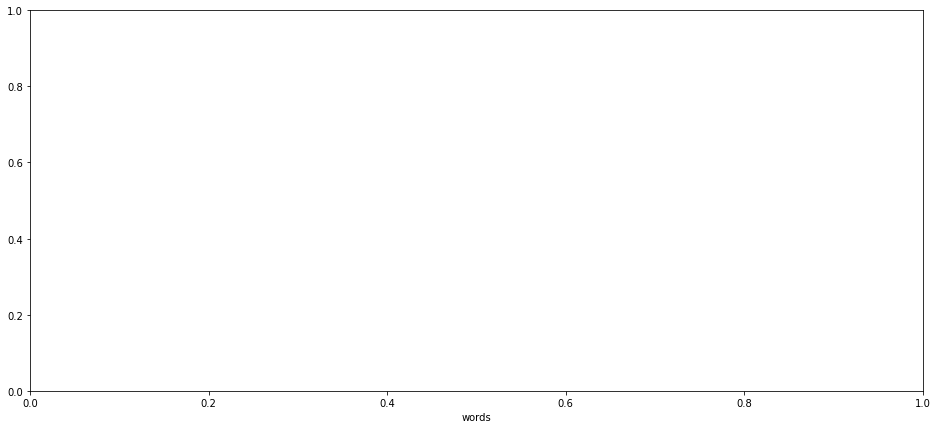

In [ ]:

# Use a ploting tool of your choice to visualize your results. 

# YOUR CODE HERE
visual_plot = plt.figure(figsize = (16,7))
visual_plot = plt.gca(xlabel='words')
visual_plot

In [ ]:
# Visible Testing
assert visual_plot.__module__ == 'matplotlib.axes._subplots', "You must create and assign to visual_plot a visualization"
